In [6]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt

In [4]:
without_bkgd_dir = os.path.join('polscope', 'SM_lf_slice_14_nobg', 'Pos0')
with_bkgd_dir = os.path.join('polscope', 'SM_lf_slice_14_processed', 'Pos0')

In [12]:
def compare_tif_images(image_path1, image_path2):
    """
    Compare two TIFF images, display the differences, and print basic statistics.
    
    Parameters:
        image_path1 (str): Path to the first TIFF image.
        image_path2 (str): Path to the second TIFF image.
    """
    # Load the images
    img1 = tifffile.imread(image_path1)
    img2 = tifffile.imread(image_path2)

    # Calculate differences
    diff = img1.astype(float) - img2.astype(float)

    # Display the images and their difference
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax1, ax2, ax3 = axes
    ax1.imshow(img1, cmap='gray')
    ax1.set_title('Image 1')
    ax1.axis('off')

    ax2.imshow(img2, cmap='gray')
    ax2.set_title('Image 2')
    ax2.axis('off')

    im = ax3.imshow(diff, cmap='coolwarm', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)), extent=[0, img1.shape[1], 0, img1.shape[0]])
    ax3.set_title('Difference')
    ax3.axis('off')
    fig.colorbar(im, ax=ax3, orientation='vertical')

    
    plt.show()

    # Print basic statistics
    print(f"Mean difference: {np.mean(diff)}")
    print(f"Standard deviation of differences: {np.std(diff)}")
    print(f"Total difference (sum of absolute differences): {np.sum(np.abs(diff))}")

In [8]:
ret_filename = 'img_000000000_1_Retardance - Computed Image_000.tif'
ret_no_bkgd_path = os.path.join(without_bkgd_dir, ret_filename)
ret_with_bkgd_path = os.path.join(with_bkgd_dir, ret_filename)

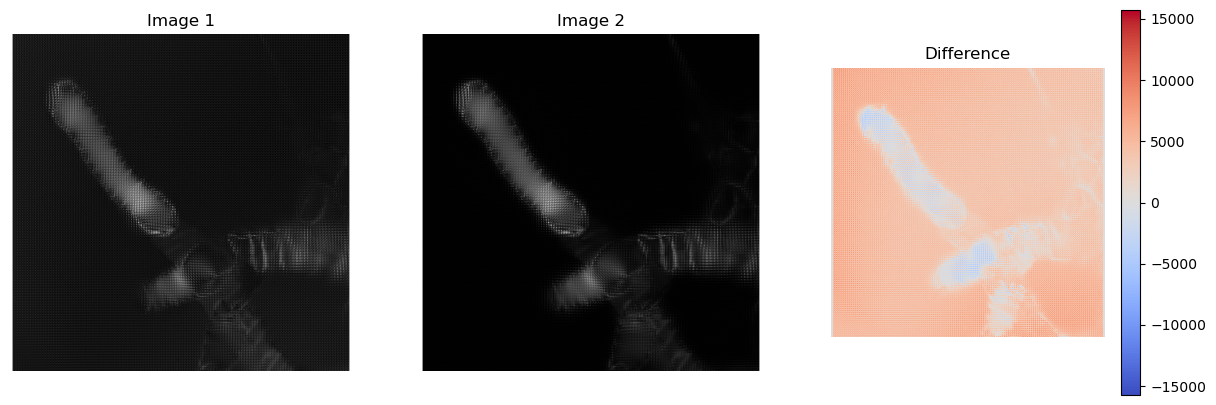

Mean difference: 3718.676689293779
Standard deviation of differences: 3119.1146726418647
Total difference (sum of absolute differences): 17884153003.0


In [13]:
compare_tif_images(ret_no_bkgd_path, ret_with_bkgd_path)

In [14]:
def compare_cropped_tif_images(image_path1, image_path2, x, y, width, height):
    """
    Compare cropped regions of two TIFF images, display the differences, and print basic statistics.
    
    Parameters:
        image_path1 (str): Path to the first TIFF image.
        image_path2 (str): Path to the second TIFF image.
        x, y (int): Coordinates of the top-left corner of the crop rectangle.
        width, height (int): Width and height of the crop rectangle.
    """
    # Load the images
    img1 = tifffile.imread(image_path1)
    img2 = tifffile.imread(image_path2)

    # Crop the images
    img1_cropped = img1[y:y+height, x:x+width]
    img2_cropped = img2[y:y+height, x:x+width]

    # Calculate differences
    diff = img1_cropped.astype(float) - img2_cropped.astype(float)

    # Display the images and their difference
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax1, ax2, ax3 = axes
    ax1.imshow(img1_cropped, cmap='gray')
    ax1.set_title('Cropped Image 1')
    ax1.axis('off')

    ax2.imshow(img2_cropped, cmap='gray')
    ax2.set_title('Cropped Image 2')
    ax2.axis('off')

    im = ax3.imshow(diff, cmap='coolwarm', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
    ax3.set_title('Difference of Cropped Area')
    ax3.axis('off')
    fig.colorbar(im, ax=ax3, orientation='vertical')
    
    plt.show()

    # Print basic statistics
    print(f"Mean difference: {np.mean(diff)}")
    print(f"Standard deviation of differences: {np.std(diff)}")
    print(f"Total difference (sum of absolute differences): {np.sum(np.abs(diff))}")

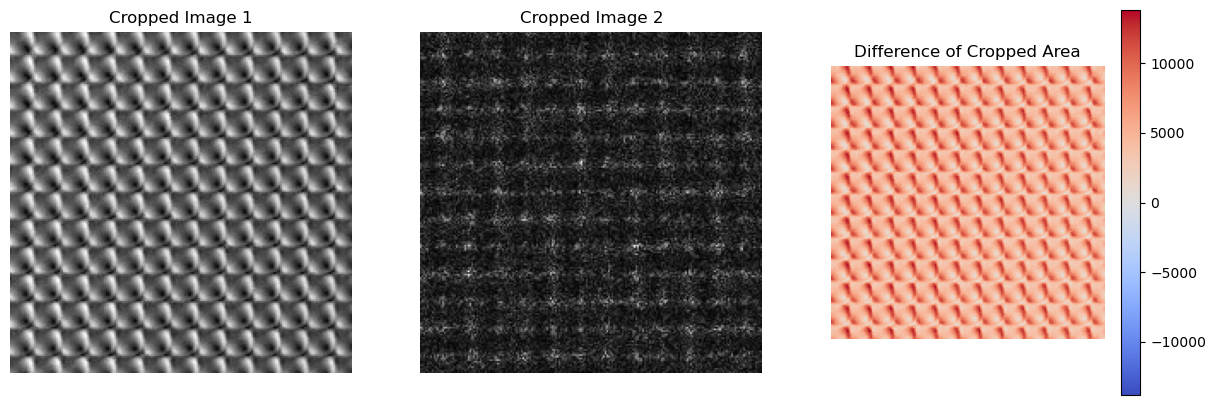

Mean difference: 5860.9365
Standard deviation of differences: 2788.0544465393336
Total difference (sum of absolute differences): 234488754.0


In [15]:
x, y, width, height = 50, 50, 200, 200  # Specify your cropping coordinates here
compare_cropped_tif_images(ret_no_bkgd_path, ret_with_bkgd_path, x, y, width, height)